Final Project 4 EDA

In [1]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("ga_global_posts.csv", encoding='ISO-8859-1')

Dropping useless features

In [2]:
data.drop(['current_sub_family','lss_subscriber_status','lss_social_brand_score', 'lss_right_people_score', 'lss_insights_score', 'score_relationships'], axis=1, inplace=True)

Installing vaderSentiment to conduct sentiment analysis

In [ ]:
!pip install vaderSentiment

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Checking the initial shape of the dataframe

In [4]:
analyzer = SentimentIntensityAnalyzer()

Computing Sentiment Analysis Scores of the Posts

In [5]:
data['sentiment_analysis'] = data['sharemediatext'].apply(lambda x: analyzer.polarity_scores(x))

Creating a new column with only the Compound Score

In [6]:
def compound_extract(e):
    return e['compound']

In [7]:
data['compound_score'] = data['sentiment_analysis'].apply(lambda x: compound_extract(x))

Generating the column that will contain my target variable: Positive or Not Positive

In [8]:
def target_variable_fxn(a):
    if a > 0:
        return 'Positive'
    if a <= 0:
        return 'Not Positive'

In [9]:
data['target_variable'] = data['compound_score'].apply(lambda x: target_variable_fxn(x))

Checking for data imbalance

In [10]:
data[(data['compound_score']>0)].count()

#There is a clear imbalance. Over 65% of posts are Positive. I need re-balance the data set. 

id                               4225
sharemediatext                   4225
postlength                       4225
seniority_2_sk                   4225
function_2_sk                    4225
company_industry_sk              4225
country_sk                       4225
career_begin_year                4225
gender_sk                        4225
connections                      4225
profile_completeness_score_ds    4225
join_year                        4225
company_size_sk                  4225
ssi                              4225
sentiment_analysis               4225
compound_score                   4225
target_variable                  4225
dtype: int64

In [12]:
X = data[['postlength','seniority_2_sk','function_2_sk','company_industry_sk','country_sk','career_begin_year','gender_sk',
          'connections','profile_completeness_score_ds','join_year','company_size_sk']]

In [13]:
y = data[['target_variable']]

In [16]:
!pip install imbalanced-learn

    100% |████████████████████████████████| 153kB 3.8MB/s ta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
from imblearn.combine import SMOTETomek

from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

/Users/ethanandrianos/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
data['target_variable'].value_counts()

Positive        4225
Not Positive    1572
Name: target_variable, dtype: int64

In [19]:
balanced_y = pd.DataFrame(y_smt)

In [20]:
balanced_y[0].value_counts()

#Data is now balanced

Positive        4050
Not Positive    4050
Name: 0, dtype: int64

In [ ]:
data.shape

In [ ]:
type(data)

In [ ]:
data.head()

In [ ]:
data.index

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
data.shape

In [ ]:
data.values

In [ ]:
data.info

In [ ]:
data.describe

In [ ]:
data.describe(include=['object'])

In [ ]:
data.describe(include='all')

In [ ]:
from matplotlib import pyplot as plt

data.career_begin_year.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # Bigger plot by increasing age
plt.xlabel('Career_Begin_Year');
plt.ylabel('Number of Posts');
plt.title('Number of Posts per Career_Begin_Year');

In [ ]:
data.postlength.hist();

In [ ]:
data['compound_score'].mean()

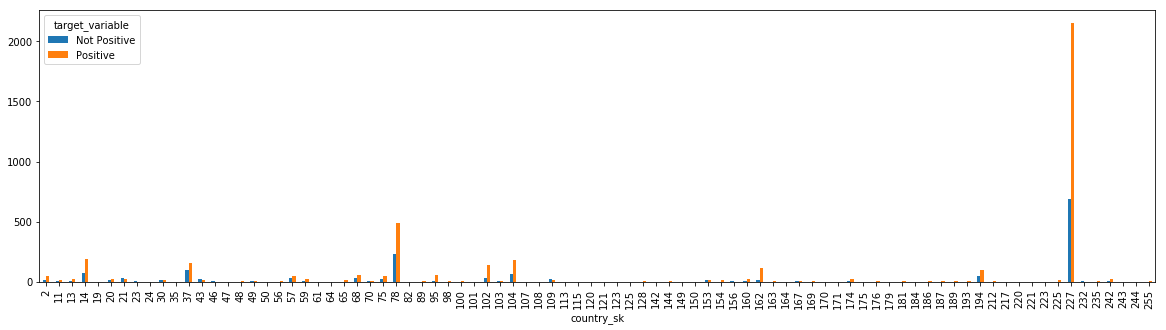

In [24]:
%matplotlib inline 

data.groupby(['country_sk', 'target_variable']).size().unstack().plot(kind='bar',figsize=(20, 5))

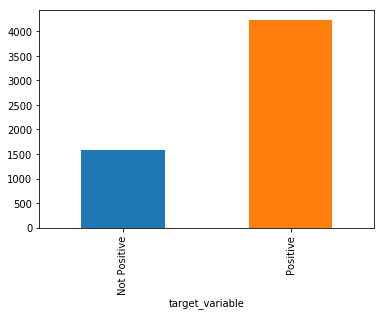

In [25]:
data.groupby('target_variable').size().plot(kind='bar')